# keyboard accessibility analysis

## Installs & Loads

In [1]:
# %pip install numpy pandas matplotlib seaborn scikit-learn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import json

In [3]:
file = "keyboard-accessibility-results.json"

In [4]:
data = json.load(open(file))

## Save all metadata info from each issue for future reference

In [5]:
all_ids = {}

data0 = data[0]['axeResults']

data0['inapplicable']

for issue in data0['inapplicable'] + data0['passes'] + data0['incomplete'] + data0['violations']:
    issue_temp = issue.copy()
    id = issue['id']
    issue_temp.pop('id')
    issue_temp.pop('impact')
    issue_temp.pop('nodes')
    all_ids[id] = issue_temp

In [6]:
# data[0]

## Find matrix of tools x issues for N/A, pass, incomplete, violation

In [7]:
tools = [x['name'] for x in data]
issues = list(all_ids.keys())
issues.sort()

In [8]:
tool_overview = {}
for i in range(len(data)): 
    data_i = data[i]['axeResults']
    tool_overview[tools[i]] = {"inapplicable": [issue['id'] for issue in data_i['inapplicable']],
                               "passes": [issue['id'] for issue in data_i['passes']],
                               "incomplete": [issue['id'] for issue in data_i['incomplete']],
                               "violations": [issue['id'] for issue in data_i['violations']]}

In [9]:
rows = {}
for tool, tool_data in tool_overview.items():
    row = {}
    for issue_id in issues:
        if issue_id in tool_data['violations']:
            row[issue_id] = 'violation'
        elif issue_id in tool_data['passes']:
            row[issue_id] = 'pass'
        elif issue_id in tool_data['incomplete']:
            row[issue_id] = 'incomplete'
        elif issue_id in tool_data['inapplicable']:
            row[issue_id] = 'N/A'
        else:
            row[issue_id] = 'N/A'
    rows[tool] = row

df_matrix = pd.DataFrame.from_dict(rows, orient='index')
df_matrix.index.name = 'Tool'

In [10]:
df_matrix.head(10)

,accesskeys,area-alt,aria-allowed-attr,aria-allowed-role,aria-braille-equivalent,aria-command-name,aria-conditional-attr,aria-deprecated-role,aria-dialog-name,aria-hidden-body,...,server-side-image-map,skip-link,summary-name,svg-img-alt,tabindex,table-duplicate-name,td-headers-attr,th-has-data-cells,valid-lang,video-caption
Tool,,,,,,,,,,,,,,,,,,,,,
AA (alignment annotator),N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,pass,...,N/A,N/A,N/A,N/A,N/A,pass,pass,N/A,N/A,N/A
abrowse (MSA viewer),N/A,N/A,pass,pass,N/A,pass,pass,pass,N/A,pass,...,N/A,N/A,N/A,N/A,pass,N/A,N/A,N/A,N/A,N/A
alignment.js,N/A,N/A,pass,pass,N/A,N/A,pass,pass,N/A,pass,...,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A
AlignmentViewer,N/A,N/A,N/A,pass,N/A,N/A,N/A,N/A,N/A,pass,...,N/A,N/A,N/A,N/A,N/A,pass,pass,N/A,N/A,N/A
AliTV,N/A,N/A,pass,pass,N/A,N/A,pass,pass,N/A,pass,...,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A
Allen Brain Map - Transcriptomics Explorer,N/A,N/A,pass,pass,N/A,N/A,pass,pass,violation,pass,...,N/A,N/A,N/A,N/A,pass,N/A,N/A,N/A,N/A,N/A
Allen Mouse Brain Connectivity Atlas,N/A,N/A,pass,pass,N/A,violation,pass,pass,violation,pass,...,N/A,N/A,N/A,N/A,pass,pass,pass,pass,N/A,N/A
AlzMap,N/A,N/A,N/A,pass,N/A,N/A,N/A,N/A,N/A,pass,...,N/A,N/A,N/A,N/A,pass,N/A,N/A,N/A,N/A,N/A
AnnoJ,N/A,pass,pass,pass,N/A,pass,pass,pass,N/A,pass,...,N/A,N/A,N/A,N/A,pass,pass,pass,N/A,N/A,N/A


In [11]:
na_counts = (df_matrix == 'N/A').sum()
all_na_columns = na_counts[na_counts == len(df_matrix)].index.tolist()

print("Columns where all tools are N/A:")
print(all_na_columns)


Columns where all tools are N/A:
['aria-braille-equivalent', 'aria-meter-name', 'aria-text', 'blink', 'frame-focusable-content', 'marquee', 'meta-refresh', 'no-autoplay-audio', 'video-caption']


/var/folders/yr/76pz9cmj7cg2kq4q_929kfvr0000gn/T/ipykernel_533/819790758.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_num = df_matrix.replace(cat_to_num).astype(int)


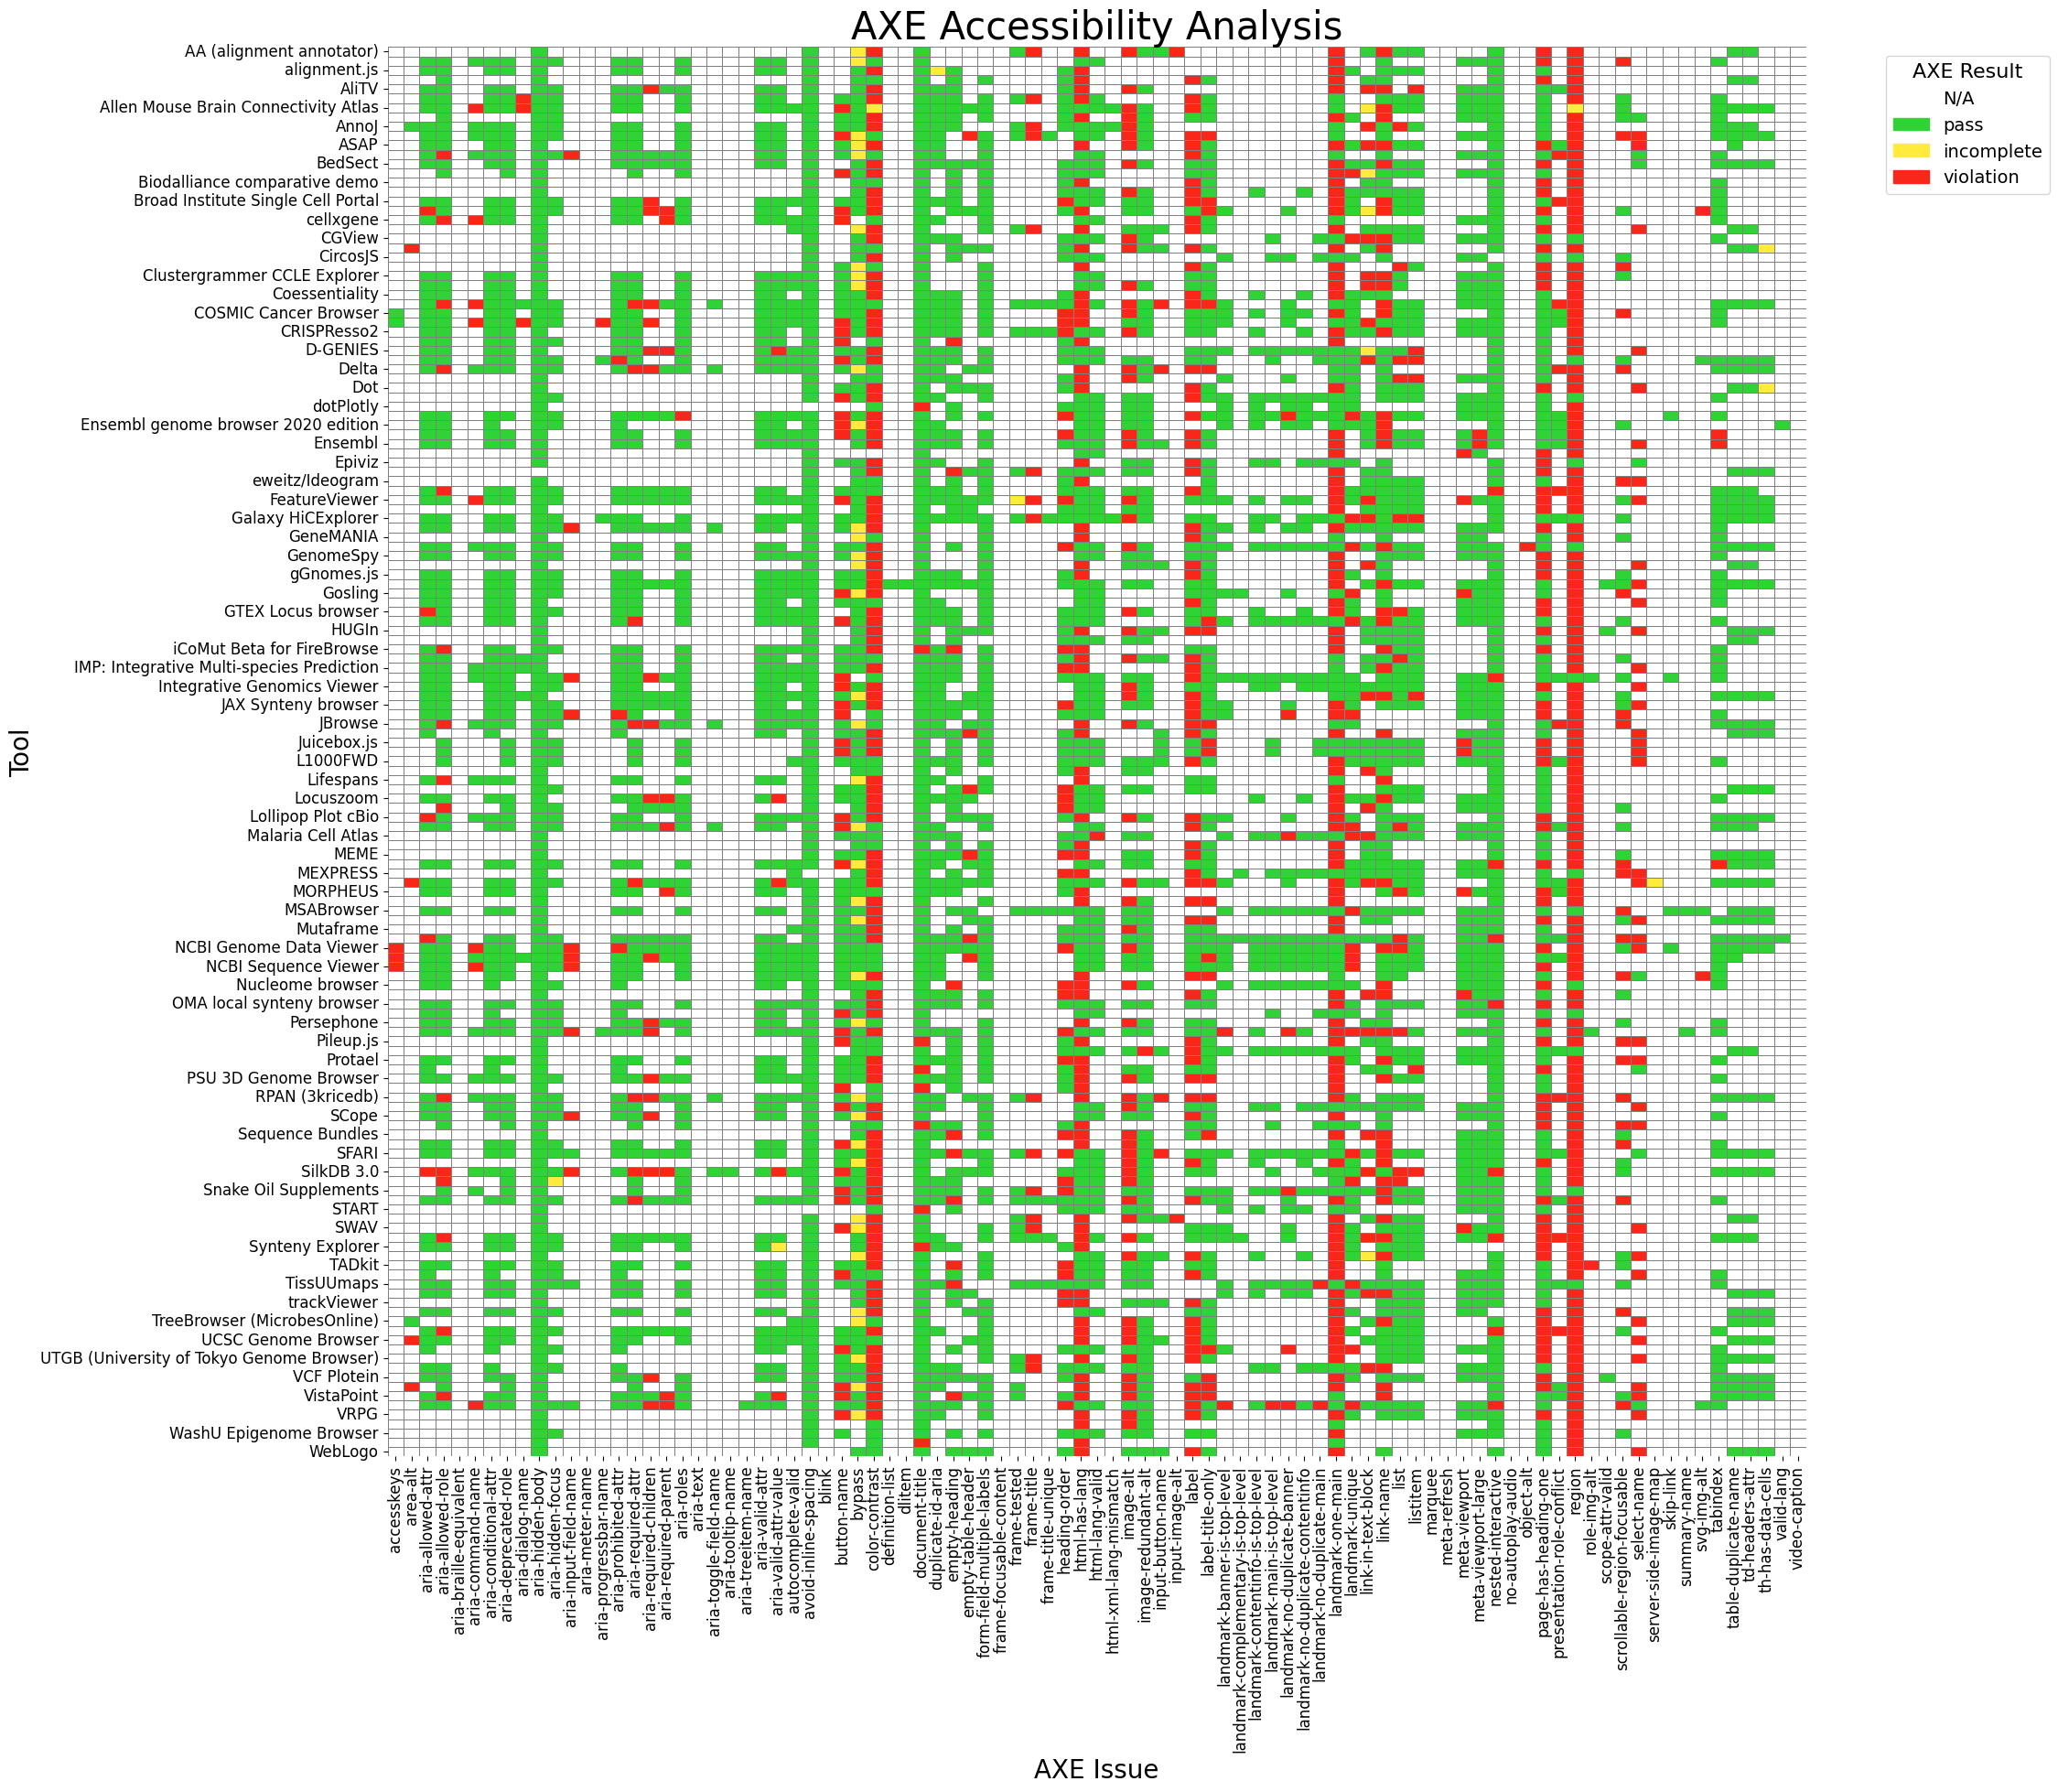

In [12]:
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

color_map = {
    'N/A': "#ffffff",
    'pass': "#30d336",
    'incomplete': '#ffeb3b',
    'violation': "#f82719"
}

categories = list(color_map.keys())
cat_to_num = {cat: i for i, cat in enumerate(categories)}
df_num = df_matrix.replace(cat_to_num).astype(int)
cmap = ListedColormap([color_map[cat] for cat in categories])

plt.figure(figsize=(20, 20))
ax = sns.heatmap(
    df_num,
    cmap=cmap,
    cbar=False,
    linewidths=0.5,
    linecolor='gray'
)

legend_handles = [mpatches.Patch(color=color, label=label) for label, color in color_map.items()]
plt.legend(
    handles=legend_handles,
    title="AXE Result",
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    fontsize=14,
    title_fontsize=16
)

plt.xticks(rotation=90, fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.xlabel("AXE Issue", fontsize=20)
plt.ylabel("Tool", fontsize=20)
plt.title("AXE Accessibility Analysis", fontsize=30)

plt.show()

## Compare issues to INSCIDAR issues

In [13]:
df_issues = pd.read_csv("inscidar_issues.csv")
issues_inscidar = list(df_issues['ID'])
issues_axe = all_ids.keys()

In [14]:
set(issues_inscidar) - set(issues_axe)


set()

In [15]:
set(issues_axe) - set(issues_inscidar)


{'aria-braille-equivalent',
 'aria-meter-name',
 'aria-text',
 'frame-tested',
 'server-side-image-map',
 'summary-name',
 'video-caption'}

## Do we have all tools?

In [16]:
df_tofinddataapp = pd.read_csv("To Find Data App URLs - uniques_by_url_manually_pruned.csv")

In [17]:
df_tofinddataapp.head(10)

,ID,Name,Source,Landing Page,Data App URL,Notes why app URL chosen,"If n/a, why?",Duplicate,Found by,Note,Need a review,Unnamed: 11
0,1,3D Genome Browser,genocat,http://3dgb.cs.mcgill.ca/,http://3dgb.cs.mcgill.ca/3dGBViewer.html?3dmod...,Error Message: Service is not available at thi...,NaN,False,Lawrence Weru,NaN,No,NaN
1,2,3dViewer,genocat,http://bioinfo.au.tsinghua.edu.cn/member/nadhi...,NaN,Server not found,NaN,False,Lawrence Weru,NaN,No,NaN
2,3,AA (alignment annotator),awesome-genome-visualization,http://www.bioinformatics.org/strap/aa,http://www.bioinformatics.org/strap/aa/aa.php?...,First example,NaN,False,Lawrence Weru,NaN,No,NaN
3,4,ABrowse (genome browser),awesome-genome-visualization,NaN,NaN,Requires credential input,NaN,False,Lawrence Weru,NaN,No,NaN
4,5,abrowse (MSA viewer),awesome-genome-visualization,https://github.com/ihh/abrowse,https://ihh.github.io/abrowse/build/index.html,First example,NaN,False,Lawrence Weru,NaN,No,NaN
5,6,ABrowse,genocat,http://www.abrowse.org/,NaN,Requires credential input,NaN,False,Lawrence Weru,NaN,No,NaN
6,7,Aequatus,awesome-genome-visualization,https://github.com/TGAC/Aequatus,NaN,Demo link dead,NaN,False,Lawrence Weru,NaN,No,NaN
7,8,AGB assembly graph browser,awesome-genome-visualization,NaN,NaN,Demo link dead,NaN,False,Lawrence Weru,NaN,No,NaN
8,9,alignment.js,awesome-genome-visualization,https://github.com/veg/alignment.js,http://alignment.hyphy.org/fasta-click-and-hover,"Has scroll, click, hover handlers",NaN,False,Lawrence Weru,NaN,No,NaN
9,10,AlignmentViewer,awesome-genome-visualization,https://alignmentviewer.org/,https://alignmentviewer.org,"Has example, but example does not generate a s...",NaN,False,Lawrence Weru,NaN,No,NaN


In [18]:
df_tofinddataapp_valid = df_tofinddataapp[df_tofinddataapp["Data App URL"].notna()]
df_tofinddataapp_valid.shape

(171, 12)

Seems like there are 20 missing ones, which are they?

In [19]:
# check if there are duplicates
print(list(df_tofinddataapp_valid['Name']) == set(df_tofinddataapp_valid['Name']))
print(list(tools) == set(tools))

False
False


In [20]:
# find duplicates
from collections import Counter

counts_dataapp = Counter(df_tofinddataapp_valid['Name'])
counts_tools = Counter(tools)

duplicates_dataapp = [item for item, count in counts_dataapp.items() if count > 1]
duplicates_tools = [item for item, count in counts_tools.items() if count > 1]

print(duplicates_dataapp)
print(duplicates_tools)

['UCSC Genome Browser', 'UCSC Xena', 'WashU Epigenome Browser']
['CGView', 'JBrowse', 'UCSC Genome Browser', 'UCSC Xena', 'WashU Epigenome Browser']


In [21]:
set(df_tofinddataapp_valid['Name']) - set(tools)

{'3D Genome Browser',
 'Brain mRNA Isoform Atlas',
 'Chromoscope',
 'Cytoscape',
 'ENCODE',
 'Edgar Genome Browser',
 'GEO',
 'GWAS catalog browser',
 'JGI/IMG',
 'Kero-BROWSE',
 'Nextstrain',
 'PLACNETw',
 'Ribbon',
 'SPRING',
 'Spatial DB',
 'SplitThreader',
 'TASUKE',
 'TFmotifView',
 'Zenbu',
 'sequence tube map'}

In [22]:
set(tools) - set(df_tofinddataapp_valid['Name'])

{'Juicebox', 'STRAP', 'Sashimi Plot'}

In [23]:
set(tools) - set(df_tofinddataapp['Name'])

{'Juicebox', 'STRAP', 'Sashimi Plot'}

So there are quite a few valid data app URLs from which we do not have the AXE results. Probably because these gave some other error.

There are 3 tools that were not part of the data app URLs that we do have AXE results from. How?

## Failure rates

In [24]:
header = ['tool_name', 'url', 'issue_id', 'issue_desc', 'issue_impact', 'issue_help', 'issue_url', 'violations', 'passes', 'total_checks', 'failure_rate']

In [25]:
rows = []

for data_i in data:
    tool_name = data_i['name']
    url = data_i['url']
    axeResults = data_i['axeResults']

    issue_dict = {}

    for issue in axeResults['passes']:
        issue_id = issue['id']
        issue_dict[issue_id] = {
            'tool_name': tool_name,
            'issue_id': issue_id,
            'issue_desc': issue['description'],
            'issue_impact': issue['impact'],
            'issue_help': issue['help'],
            'issue_url': issue['helpUrl'],
            'passes': len(issue['nodes']),
            'violations': 0
        }

    for issue in axeResults['violations']:
        issue_id = issue['id']
        if issue_id in issue_dict:
            issue_dict[issue_id]['violations'] = len(issue['nodes'])
            issue_dict[issue_id]['issue_impact'] = issue['impact']
        else:
            issue_dict[issue_id] = {
                'tool_name': tool_name,
                'issue_id': issue_id,
                'issue_desc': issue['description'],
                'issue_impact': issue['impact'],
                'issue_help': issue['help'],
                'issue_url': issue['helpUrl'],
                'passes': 0,
                'violations': len(issue['nodes'])
            }

    rows.extend(issue_dict.values())

df_reports = pd.DataFrame(rows)
df_reports['total_checks'] = df_reports['passes'] + df_reports['violations']
df_reports['failure_rate'] = df_reports['violations'] / df_reports['total_checks'].replace(0, np.nan)


In [26]:
df_reports.head(10)

,tool_name,issue_id,issue_desc,issue_impact,issue_help,issue_url,passes,violations,total_checks,failure_rate
0,AA (alignment annotator),aria-hidden-body,"Ensure aria-hidden=""true"" is not present on th...",None,"aria-hidden=""true"" must not be present on the ...",https://dequeuniversity.com/rules/axe/4.10/ari...,1,0,1,0.000000
1,AA (alignment annotator),avoid-inline-spacing,Ensure that text spacing set through style att...,None,Inline text spacing must be adjustable with cu...,https://dequeuniversity.com/rules/axe/4.10/avo...,23,0,23,0.000000
2,AA (alignment annotator),color-contrast,Ensure the contrast between foreground and bac...,serious,Elements must meet minimum color contrast rati...,https://dequeuniversity.com/rules/axe/4.10/col...,12,10,22,0.454545
3,AA (alignment annotator),document-title,Ensure each HTML document contains a non-empty...,None,Documents must have <title> element to aid in ...,https://dequeuniversity.com/rules/axe/4.10/doc...,1,0,1,0.000000
4,AA (alignment annotator),frame-tested,Ensure <iframe> and <frame> elements contain t...,None,Frames should be tested with axe-core,https://dequeuniversity.com/rules/axe/4.10/fra...,2,0,2,0.000000
5,AA (alignment annotator),image-redundant-alt,Ensure image alternative is not repeated as text,None,Alternative text of images should not be repea...,https://dequeuniversity.com/rules/axe/4.10/ima...,2,0,2,0.000000
6,AA (alignment annotator),input-button-name,Ensure input buttons have discernible text,None,Input buttons must have discernible text,https://dequeuniversity.com/rules/axe/4.10/inp...,7,0,7,0.000000
7,AA (alignment annotator),link-in-text-block,Ensure links are distinguished from surroundin...,None,Links must be distinguishable without relying ...,https://dequeuniversity.com/rules/axe/4.10/lin...,1,0,1,0.000000
8,AA (alignment annotator),link-name,Ensure links have discernible text,serious,Links must have discernible text,https://dequeuniversity.com/rules/axe/4.10/lin...,4,2,6,0.333333
9,AA (alignment annotator),list,Ensure that lists are structured correctly,None,"<ul> and <ol> must only directly contain <li>,...",https://dequeuniversity.com/rules/axe/4.10/lis...,2,0,2,0.000000


Similar to INSCIDAR

In [27]:
reports = df_reports

In [28]:
"""
Store the column names for metadata of pages
"""
ISSUE_COLUMNS = [
    'issue_id',
    'issue_desc',
    'issue_impact',
    'issue_help',
    'issue_url',
    # 'issue_name',
    # 'issue_filter',
    # 'issue_overall_impact',
    # 'issue_note_overall_impact_hdv',
    # 'issue_severity',
    # 'issue_data_related',
    # 'issue_data_related_rule',
    # 'issue_pour_category',
    # 'issue_wcag_level',
    # 'issue_difficulty_to_fix',
    # 'issue_missing_label_related'
]
PAGE_METADATA_COLUMNS = [a for a in reports.columns.tolist() if a not in (ISSUE_COLUMNS + ['violations', 'passes', 'total_checks', 'failure_rate'])]

In [29]:
PAGE_METADATA_COLUMNS

['tool_name']

In [30]:
"""
Group by Page
"""
reports_by_page = reports.groupby(
    PAGE_METADATA_COLUMNS,
    dropna=False 
).agg({
    'violations': 'sum',
    'passes': 'sum',
    'total_checks': 'sum',
}).reset_index()

"""
Calculate the failure rate
"""
reports_by_page['failure_rate'] = reports_by_page.violations / reports_by_page.total_checks

In [31]:
reports_by_page.head(10)

,tool_name,violations,passes,total_checks,failure_rate
0,AA (alignment annotator),30,130,160,0.187500
1,ASAP,38,1626,1664,0.022837
2,AliTV,15,3911,3926,0.003821
3,AlignmentViewer,9,116,125,0.072000
4,Allen Brain Map - Transcriptomics Explorer,38,489,527,0.072106
5,Allen Mouse Brain Connectivity Atlas,18,242,260,0.069231
6,AlzMap,18,849,867,0.020761
7,AnnoJ,33,284,317,0.104101
8,Apollo,25,640,665,0.037594
9,Avivator,13,603,616,0.021104


In [32]:
reports_by_page_sorted = reports_by_page.sort_values(by="failure_rate", ascending=True)

In [33]:
average_tool_failure_rate = reports_by_page['failure_rate'].mean()
average_tool_failure_rate

np.float64(0.061913642041459514)

In [34]:
print(reports_by_page['failure_rate'].min())
print(reports_by_page['failure_rate'].max())

0.0003586800573888092
0.3333333333333333


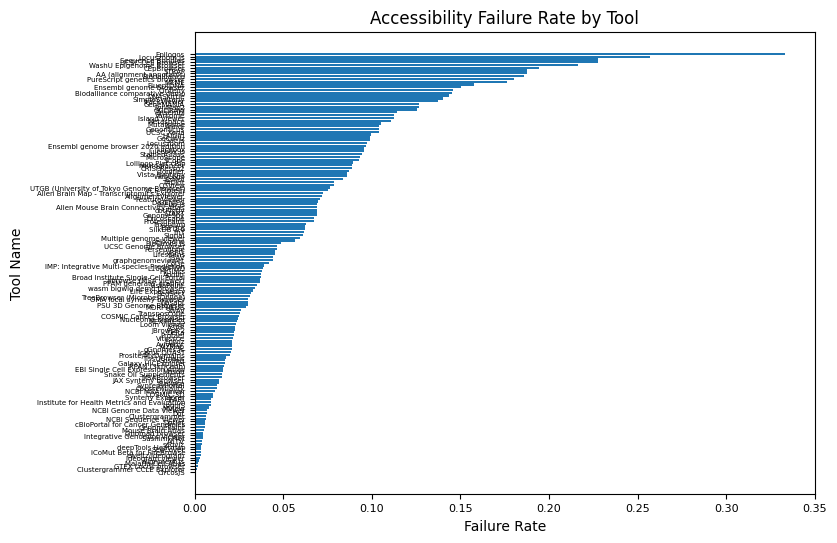

In [35]:
plt.figure(figsize=(8, 6))
plt.barh(reports_by_page_sorted["tool_name"], reports_by_page_sorted["failure_rate"])
plt.xlabel("Failure Rate")
plt.ylabel("Tool Name")
plt.title("Accessibility Failure Rate by Tool")
plt.xticks(size=8)
plt.yticks(size=5)
plt.show()


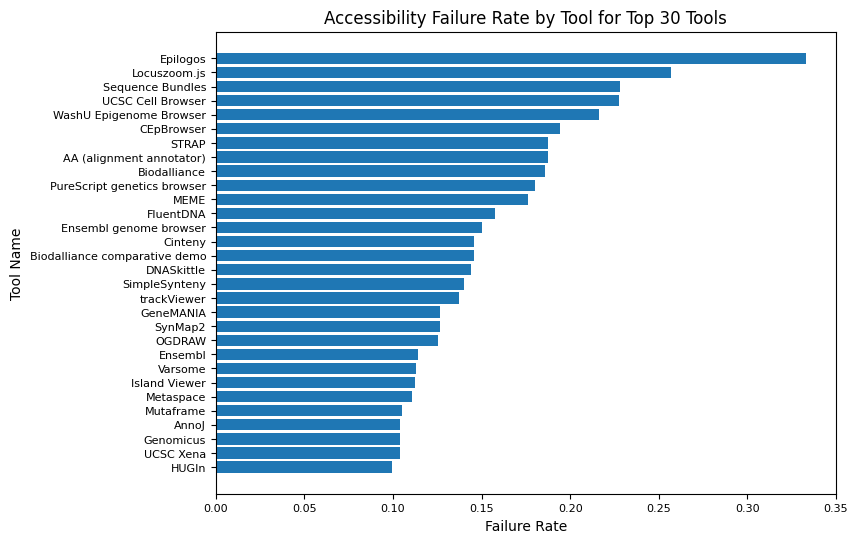

In [36]:
plt.figure(figsize=(8, 6))
plt.barh(reports_by_page_sorted["tool_name"][-30:], reports_by_page_sorted["failure_rate"][-30:])
plt.xlabel("Failure Rate")
plt.ylabel("Tool Name")
plt.title("Accessibility Failure Rate by Tool for Top 30 Tools")
plt.xticks(size=8)
plt.yticks(size=8)
plt.show()

In [37]:
"""
Group by Issue
"""
reports_by_issue = reports.groupby(
    ['issue_id'],
    dropna=False 
).agg({
    'violations': 'sum',
    'passes': 'sum',
    'total_checks': 'sum',
}).reset_index()

In [38]:
reports_by_issue.head(10)

,issue_id,violations,passes,total_checks
0,accesskeys,3,14,17
1,area-alt,431,513,944
2,aria-allowed-attr,54,2813,2867
3,aria-allowed-role,73,11957,12030
4,aria-command-name,30,156,186
5,aria-conditional-attr,0,2867,2867
6,aria-deprecated-role,0,5244,5244
7,aria-dialog-name,5,5,10
8,aria-hidden-body,0,155,155
9,aria-hidden-focus,0,1101,1101


In [39]:
reports_by_issue_sorted = reports_by_issue.sort_values(by="violations", ascending=False)
reports_by_issue_sorted.head(10)

average_violations = reports_by_issue['violations'].mean()
average_violations

np.float64(124.89873417721519)

## Violations

In [40]:
# find violation severity

# is severity different for different tools? or always the same with the same issue id?
mapping_issue_impact = {}

for data_i in data:
    tool_name = data_i['name']
    axeResults = data_i['axeResults']
    for issue in axeResults['violations']:
        issue_id = issue['id']
        impact = issue['impact']
        if issue_id not in mapping_issue_impact:
            mapping_issue_impact[issue_id] = set()
        mapping_issue_impact[issue_id].add(impact)
        
for issue_id, impacts in mapping_issue_impact.items():
    if len(impacts) > 1:
        print(f"Issue ID {issue_id} has multiple impacts: {impacts}")

# so each issue has always the same impact
mapping_issue_impact = {issue_id: list(impacts)[0] for issue_id, impacts in mapping_issue_impact.items()}

In [41]:
mapping_issue_impact

{'color-contrast': 'serious',
 'frame-title': 'serious',
 'html-has-lang': 'serious',
 'image-alt': 'critical',
 'input-image-alt': 'critical',
 'landmark-one-main': 'moderate',
 'link-name': 'serious',
 'page-has-heading-one': 'moderate',
 'region': 'moderate',
 'scrollable-region-focusable': 'serious',
 'label': 'critical',
 'aria-required-children': 'critical',
 'link-in-text-block': 'serious',
 'listitem': 'serious',
 'aria-dialog-name': 'serious',
 'aria-command-name': 'serious',
 'button-name': 'critical',
 'list': 'serious',
 'empty-table-header': 'minor',
 'label-title-only': 'serious',
 'select-name': 'critical',
 'aria-allowed-role': 'minor',
 'aria-input-field-name': 'serious',
 'presentation-role-conflict': 'minor',
 'landmark-unique': 'moderate',
 'heading-order': 'moderate',
 'aria-allowed-attr': 'critical',
 'aria-required-parent': 'critical',
 'svg-img-alt': 'serious',
 'area-alt': 'critical',
 'aria-required-attr': 'critical',
 'input-button-name': 'critical',
 'aria-p

In [42]:
"""
Group by Impact
"""
reports['impact'] = reports['issue_id'].map(mapping_issue_impact)
reports_by_impact = reports.groupby(
    ['impact'],
    dropna=False 
).agg({
    'violations': 'sum',
    'passes': 'sum',
    'total_checks': 'sum',
}).reset_index()

reports_by_impact.sort_values(by="impact", key=lambda x: x.map({'critical': 0, 'serious': 1, 'moderate': 2, 'minor': 3}), ascending=True)

,impact,violations,passes,total_checks
0,critical,2178,22604,24782
3,serious,3714,32233,35947
2,moderate,3787,159111,162898
1,minor,188,14811,14999
4,NaN,0,63218,63218


## Keyboard specific issues

In [43]:
categoriesToCheck = [
    "cat.keyboard","wcag131","wcag211","wcag213","wcag221","wcag241","wcag332","wcag412",
    "wcag132","wcag1413","wcag212","wcag214","wcag243","wcag247","wcag251","wcag253","wcag321","wcag322","wcag325" # <- axe doesn't seem to test for these
]

In [44]:
keyboard_issues = [issue for issue in all_ids.keys() if any(tag in categoriesToCheck for tag in all_ids[issue]["tags"])]

In [45]:
print(len(all_ids.keys()))
print(len(keyboard_issues))

89
45


In [46]:
keyboard_issues_impact = {issue: mapping_issue_impact[issue] if issue in mapping_issue_impact else "unknown" for issue in keyboard_issues}
keyboard_issues_impact

{'accesskeys': 'serious',
 'area-alt': 'critical',
 'aria-allowed-attr': 'critical',
 'aria-braille-equivalent': 'unknown',
 'aria-command-name': 'serious',
 'aria-conditional-attr': 'unknown',
 'aria-deprecated-role': 'unknown',
 'aria-hidden-focus': 'unknown',
 'aria-input-field-name': 'serious',
 'aria-prohibited-attr': 'serious',
 'aria-required-attr': 'critical',
 'aria-required-children': 'critical',
 'aria-required-parent': 'critical',
 'aria-roles': 'critical',
 'aria-toggle-field-name': 'unknown',
 'aria-tooltip-name': 'unknown',
 'aria-valid-attr-value': 'critical',
 'aria-valid-attr': 'unknown',
 'button-name': 'critical',
 'definition-list': 'unknown',
 'dlitem': 'unknown',
 'duplicate-id-aria': 'unknown',
 'form-field-multiple-labels': 'unknown',
 'frame-focusable-content': 'unknown',
 'frame-title-unique': 'unknown',
 'label': 'critical',
 'meta-refresh': 'unknown',
 'scrollable-region-focusable': 'serious',
 'select-name': 'critical',
 'server-side-image-map': 'unknown',

Should we rerun all with just these issues? What to report?